In [13]:
#IMPORT ALL DATA FINAL MODEL
from PIL import Image
import numpy as np
import os
from tensorflow.keras.utils import to_categorical

train_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\train'
validation_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\validation'

image_shape = (64, 64)
# Data arrays for images, regression info, and class labels
train_images = []
train_regression_info = []
train_class_labels = []
val_images = []
val_regression_info = []
val_class_labels = []

# List all image filenames (without extensions)
image_filenames = [filename[:-4] for filename in os.listdir(train_PATH) if filename.endswith('.jpg')]

# Load images, corresponding regression info, and class labels
for image_filename in image_filenames:
    print(image_filename)
    # Create correct path to resources
    image_path = os.path.join(train_PATH, image_filename + '.jpg')
    information_path = os.path.join(train_PATH, image_filename + '.txt')

    # Load image
    image = Image.open(image_path)
    image = image.resize(image_shape)  # Resize to the desired input shape
    image_array = np.array(image) / 255.0  # Normalize pixel values
    train_images.append(image_array)

    # Load regression info from txt file
    with open(information_path, 'r') as f:
        possible_values = f.readline().strip().split(' ')
        regression_values = []
        for counter, value in enumerate(possible_values):
            if counter == 0: # First value always class
                class_label = int(possible_values[0])
            else:
                regression_values.append(float(possible_values[counter]))
        train_class_labels.append(class_label)
        train_regression_info.append(regression_values)

# List all image filenames (without extensions)
image_filenames = [filename[:-4] for filename in os.listdir(validation_PATH) if filename.endswith('.jpg')]

for image_filename in image_filenames:
    print(image_filename)
    # Create correct path to resources
    image_path = os.path.join(validation_PATH, image_filename + '.jpg')
    information_path = os.path.join(validation_PATH, image_filename + '.txt')

    # Load image
    image = Image.open(image_path)
    image = image.resize(image_shape)  # Resize to the desired input shape
    image_array = np.array(image) / 255.0  # Normalize pixel values
    val_images.append(image_array)

    # Load regression info from txt file
    with open(information_path, 'r') as f:
        possible_values = f.readline().strip().split(' ')
        regression_values = []
        for counter, value in enumerate(possible_values):
            if counter == 0: # First value always class
                class_label = int(possible_values[0])
            else:
                regression_values.append(float(possible_values[counter]))
        val_class_labels.append(class_label)
        val_regression_info.append(regression_values)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_regression_info = np.array(train_regression_info)
train_class_labels = np.array(train_class_labels)
train_class_labels_one_hot = to_categorical(train_class_labels) # Useful for categorical_crossentropy

val_images = np.array(val_images)
val_regression_info = np.array(val_regression_info)
val_class_labels = np.array(val_class_labels)
val_class_labels_one_hot = to_categorical(val_class_labels) # Useful for categorical_crossentropy

00002_0
00003_0
00011_0
00017_0
00020_0
00023_0
00029_0
00030_0
00031_0
00033_0
00033_1
00042_1
00043_0
00045_0
00048_0
00050_0
00054_0
00059_0
00061_0
00061_1
00062_0
00063_0
00065_0
00066_1
00069_0
00072_0
00076_0
00077_0
00079_0
00080_0
00081_0
00081_1
00083_0
00085_0
00087_0
00087_1
00089_0
00091_0
00092_0
00103_0
00103_1
00104_0
00105_0
00106_1
00106_2
00107_0
00109_0
00109_1
00117_0
00117_1
00120_0
00123_0
00124_0
00126_0
00126_1
00129_0
00131_1
00132_0
00132_2
00133_0
00133_1
00136_0
00138_0
00138_1
00139_0
00141_0
00142_0
00145_0
00146_0
00146_1
00150_0
00152_0
00154_0
00155_1
00156_0
00156_1
00157_0
00158_0
00159_1
00162_0
00164_0
00166_0
00167_0
00169_0
00169_1
00172_0
00175_0
00179_0
00180_0
00186_0
00186_1
00187_0
00189_0
00189_1
00195_0
00201_0
00202_0
00202_3
00204_0
00207_0
00208_0
00209_0
00214_0
00215_0
00217_0
00218_3
00225_0
00229_0
00229_1
00234_0
00236_0
00240_0
00242_0
00244_0
00248_0
00249_0
00252_0
00258_0
00263_0
00263_1
00263_2
00266_0
00272_0
00274_0
00275_0


In [14]:
#FINAL MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental import preprocessing

# Define input shape for the images
input_shape = (64, 64, 3)

inputs = keras.Input(shape=input_shape)
x = Conv2D(filters=16, kernel_size=2, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=2, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=2, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)

# Classification head for classification of the images' classes
classification_head = Dense(4, activation='softmax', name='classification')(x)

# Regression head for the location of the sign in the image
regression_head = Dense(64, activation='relu')(x)
regression_head = Dense(32, activation='relu')(regression_head)
regression_head = Dense(4, activation='sigmoid', name='regression')(regression_head)

# Build the final model
model = Model(inputs=inputs, outputs=[classification_head, regression_head])

# Define loss functions and weights
losses = {'classification': 'categorical_crossentropy', 'regression': 'mean_squared_error'}

# Optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model with multiple outputs
model.compile(optimizer=optimizer, loss=losses, metrics=["accuracy"])

# Display the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 63, 63, 16)   208         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 31, 31, 16)  0           ['conv2d_3[0][0]']               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 30, 30, 32)   2080        ['max_pooling2d_3[0][0]']        
                                                                                            

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with regression and classification tasks
history=model.fit(
    x=train_images,
    y={'classification': train_class_labels_one_hot, 'regression': train_regression_info},
    validation_data=(val_images, {'classification': val_class_labels_one_hot, 'regression': val_regression_info}),
    epochs=10, # Adjust the number of epochs
    #callbacks=[callback],
    batch_size=16  # Adjust the batch size
)

Epoch 1/10
400/400 [==============================] - 6s 13ms/step - loss: 0.8430 - classification_loss: 0.8344 - regression_loss: 0.0086 - classification_accuracy: 0.6533 - regression_accuracy: 0.6095 - val_loss: 0.4518 - val_classification_loss: 0.4483 - val_regression_loss: 0.0035 - val_classification_accuracy: 0.8438 - val_regression_accuracy: 0.6400
Epoch 2/10
400/400 [==============================] - 5s 12ms/step - loss: 0.5414 - classification_loss: 0.5362 - regression_loss: 0.0051 - classification_accuracy: 0.7948 - regression_accuracy: 0.6983 - val_loss: 0.3895 - val_classification_loss: 0.3867 - val_regression_loss: 0.0029 - val_classification_accuracy: 0.8675 - val_regression_accuracy: 0.7150
Epoch 3/10
400/400 [==============================] - 5s 13ms/step - loss: 0.4651 - classification_loss: 0.4606 - regression_loss: 0.0045 - classification_accuracy: 0.8298 - regression_accuracy: 0.7355 - val_loss: 0.3216 - val_classification_loss: 0.3191 - val_regression_loss: 0.0025 -

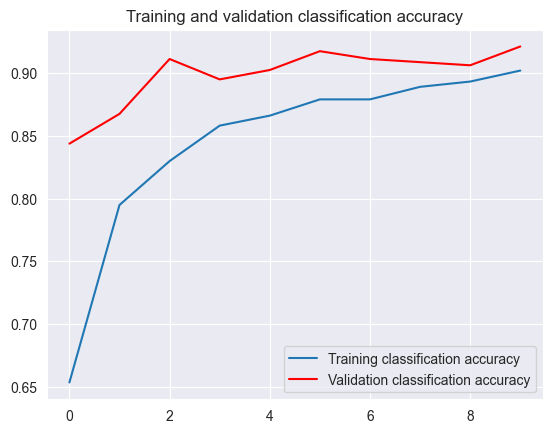

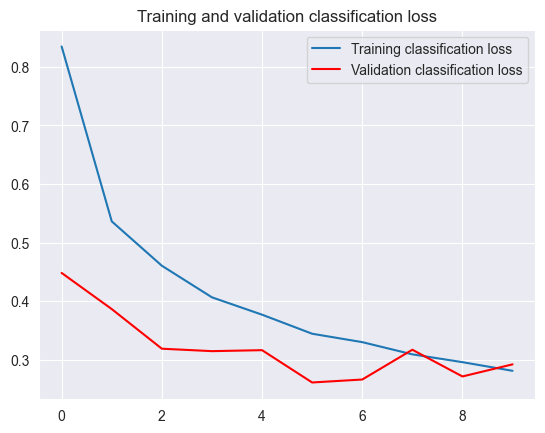

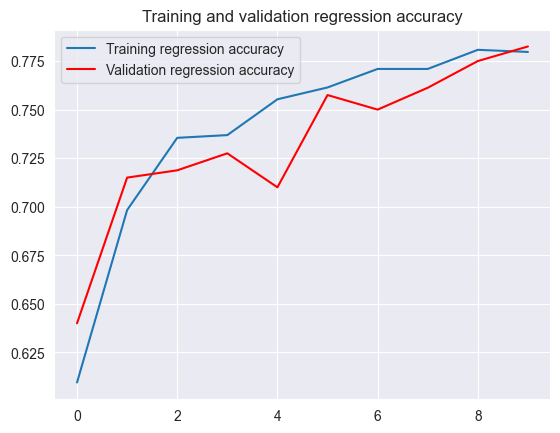

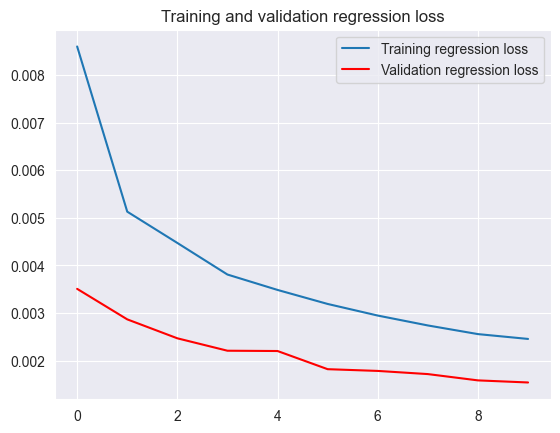

In [16]:
#SHOW GRAPHS AND SAVE MODEL
import matplotlib.pyplot as plt

generic_path = 'C:\\Users\\marru\\Pictures\\cnns'
if not os.path.exists(generic_path):
    os.mkdir(generic_path)
model_name='fifth_model_1'
save_path = os.path.join(generic_path, model_name)
if os.path.exists(save_path):
    print('Already exists!')
    raise KeyboardInterrupt
os.makedirs(save_path)
model.save(os.path.join(save_path, model_name+'.h5'))

class_acc = history.history['classification_accuracy']
val_class_acc = history.history['val_classification_accuracy']
class_loss = history.history['classification_loss']
val_class_loss = history.history['val_classification_loss']

regr_acc = history.history['regression_accuracy']
val_regr_acc = history.history['val_regression_accuracy']
regr_loss = history.history['regression_loss']
val_regr_loss = history.history['val_regression_loss']

epochs = range(10)

plt.title('Training and validation classification accuracy')
plt.plot(epochs, class_acc, label='Training classification accuracy')
plt.plot(epochs, val_class_acc, color='red', label='Validation classification accuracy')
plt.legend()
plt.savefig(os.path.join(save_path, 'classification_accuracy.png'))

plt.figure()

plt.title('Training and validation classification loss')
plt.plot(epochs, class_loss, label='Training classification loss')
plt.plot(epochs, val_class_loss, color='red', label='Validation classification loss')
plt.legend()
plt.savefig(os.path.join(save_path, 'classification_loss.png'))

plt.figure()

plt.title('Training and validation regression accuracy')
plt.plot(epochs, regr_acc, label='Training regression accuracy')
plt.plot(epochs, val_regr_acc, color='red', label='Validation regression accuracy')
plt.legend()
plt.savefig(os.path.join(save_path, 'regression_accuracy.png'))

plt.figure()

plt.title('Training and validation regression loss')
plt.plot(epochs, regr_loss, label='Training regression loss')
plt.plot(epochs, val_regr_loss, color='red', label='Validation regression loss')
plt.legend()
plt.savefig(os.path.join(save_path, 'regression_loss.png'))

plt.show()

030_0027
1/1 [==============================] - 0s 53ms/step
Predicted Class Labels: [0]
Predicted Regression Boxes: [[0.48706746 0.4825597  0.5328946  0.6071919 ]]


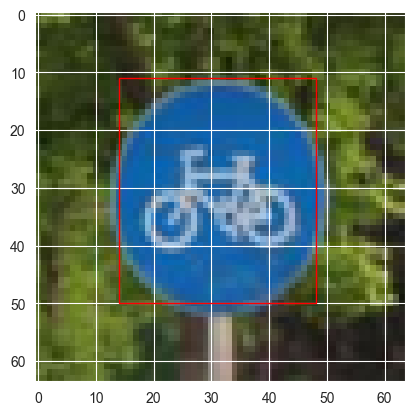

In [18]:
#Show Training results on photos
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model

test_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\test'

generic_PATH = 'C:\\Users\\marru\\Pictures\\cnns'
save_PATH = os.path.join(generic_PATH, model_name)

# Load trained model
model = tf.keras.models.load_model(os.path.join(save_PATH, model_name+'.h5'))

# Choose random image from the list
image_filenames = [filename[:-4] for filename in os.listdir(test_PATH) if filename.endswith('.jpg')]
image_filename = random.choice(image_filenames)
print(image_filename)

# Paths in which we have the information
image_path = os.path.join(test_PATH, image_filename + '.jpg')

# Load a new image and preprocess it
new_image = Image.open(image_path)
new_image = new_image.resize((64, 64))
new_image_array = np.array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

# Make predictions using the model
predictions = model.predict(new_image_array)

# Retrieve the predicted class labels and regression boxes
predicted_class_labels = predictions[0]  # The first output corresponds to classification
predicted_regression_boxes = predictions[1]  # The second output corresponds to regression

# If you used one-hot encoding for class labels, you can convert them back to class indices
predicted_class_indices = np.argmax(predicted_class_labels, axis=1)

# Now, you have the predicted class labels and regression boxes for the new image
print("Predicted Class Labels:", predicted_class_indices)
print("Predicted Regression Boxes:", predicted_regression_boxes)

# Display the image
plt.imshow(new_image)

# Plot bounding boxes on the image
for box in predicted_regression_boxes:
    x, y, width, height = box  # Extract box coordinates
    x *= new_image.width  # Scale box coordinates to image size
    y *= new_image.height
    width *= new_image.width
    x1 = round(x - width / 2)
    height *= new_image.height
    y1 = round(y - height / 2)
    # Create a rectangle patch
    rect = plt.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Show the image with bounding boxes
plt.show()

00021_0
00025_0
00026_0
00027_0
00042_0
00055_0
00074_0
00082_0
00082_1
00094_0
00097_0
00106_0
00116_0
00125_0
00131_0
00132_1
00142_1
00144_0
00151_0
00154_1
00163_0
00177_1
00184_0
00194_0
00202_1
00203_0
00205_0
00216_0
00216_1
00217_1
00218_2
00230_0
00233_0
00238_0
00257_0
00262_0
00275_1
00280_0
00281_1
00289_0
00296_0
00299_0
002_0001
002_0002
002_0003_j
002_0007_j
002_0011_j
002_0017
002_0020
002_0024
002_0028
002_1_0022
002_1_0035
002_1_0039
00316_0
00345_0
00367_1
00369_0
00373_0
00374_3
00376_0
00383_0
00387_0
00397_0
003_0009_j
003_0010_j
003_0011_j
003_0013
003_0021
003_0027
003_0027_j
003_0028_j
003_0031
003_0032
003_0050
003_0056
003_0061
003_0065
003_0074
003_0080
003_0083
003_0090
003_0097
003_0111
003_0123
003_0127
003_1_0004_1_j
003_1_0008
003_1_0009
003_1_0013_1_j
003_1_0016_1_j
003_1_0017_1_j
003_1_0018_1_j
003_1_0019
003_1_0021_1_j
003_1_0022_1_j
003_1_0023_1_j
003_1_0030
003_1_0041
003_1_0047
003_1_0053
003_1_0056
003_1_0072
003_1_0076
003_1_0099
003_1_0104
003_

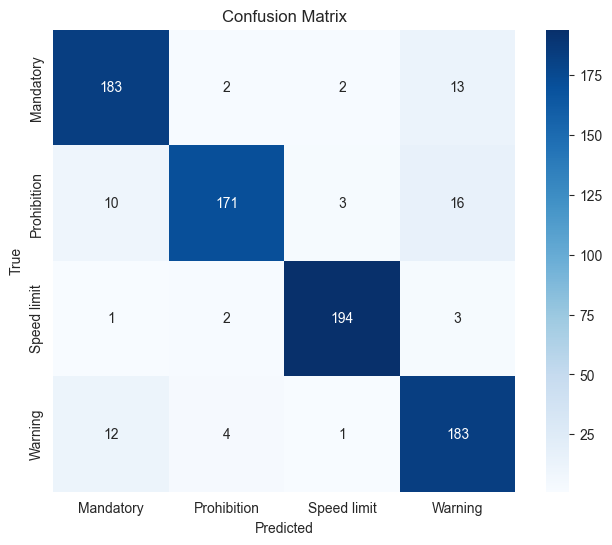

In [19]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.utils import to_categorical

#TESTING NETWORK FOR DATA NEVER SEEN IN INPUT
test_PATH = 'C:\\Users\\marru\\Documents\\Magistrale\\Secondo_Semestre\\I_Systems\\Project\\final_datasets\\test'
generic_PATH = 'C:\\Users\\marru\\Pictures\\cnns'
save_PATH = os.path.join(generic_PATH, model_name)

# Load trained model
model = tf.keras.models.load_model(os.path.join(save_PATH, model_name+'.h5'))

image_shape = (64, 64)
# Data arrays for images, regression info, and class labels
test_images = []
test_regression_info = []
test_class_labels = []

# List all image filenames (without extensions)
image_filenames = [filename[:-4] for filename in os.listdir(test_PATH) if filename.endswith('.jpg')]

# Load images, corresponding regression info, and class labels
for image_filename in image_filenames:
    print(image_filename)
    # Create correct path to resources
    image_path = os.path.join(test_PATH, image_filename + '.jpg')
    information_path = os.path.join(test_PATH, image_filename + '.txt')

    # Load image
    image = Image.open(image_path)
    image = image.resize((64, 64))  # Resize to the desired input shape
    image_array = np.array(image) / 255.0  # Normalize pixel values
    test_images.append(image_array)

    # Load regression info from txt file
    with open(information_path, 'r') as f:
        possible_values = f.readline().strip().split(' ')
        regression_values = []
        for counter, value in enumerate(possible_values):
            if counter == 0: # First value always class
                class_label = int(possible_values[0])
            else:
                regression_values.append(float(possible_values[counter]))
        test_class_labels.append(class_label)
        test_regression_info.append(regression_values)

# Convert lists to numpy arrays
test_images = np.array(test_images)
test_regression_info = np.array(test_regression_info)
test_class_labels = np.array(test_class_labels)
test_class_labels_one_hot = to_categorical(test_class_labels) # Useful for categorical_crossentropy

predicted_labels=[]

for test_image in test_images:
    test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
    predictions = model.predict(test_image)
    predicted=predictions[0]  # The first output corresponds to classification
    predicted_class_indices = np.argmax(predicted, axis=1)
    #print(predicted_class_indices)
    predicted_labels.append(predicted_class_indices)


predicted_labels = np.array(predicted_labels)
predicted_labels_one_hot = to_categorical(predicted_labels)
final_predicted_labels = np.argmax(predicted_labels_one_hot, axis=1)
#print('final_predicted_labels', final_predicted_labels)
true_labels = np.argmax(test_class_labels_one_hot, axis=1)  # Assuming you have one-hot encoded
#print('true_labels', true_labels)
confusion = confusion_matrix(true_labels, final_predicted_labels)

class_labels=['Mandatory','Prohibition','Speed limit','Warning']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(save_path, 'confusion_matrix' + model_name + '.png'))
plt.show()